Orientation space demo
===

This is a quick example for computing and analyzing orientation space

In [1]:
import PyDIP as dip

First we'll create a test image with five intersecting rings

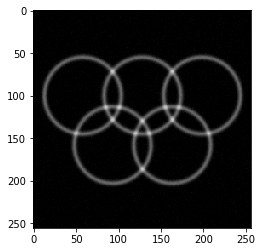

In [2]:
img = dip.Image([256, 256])
img.Fill(0)
dip.DrawBandlimitedBall(img, 90, [128, 100], [512], 'empty', 2.0)
dip.DrawBandlimitedBall(img, 90, [128 + 70, 100], [512], 'empty', 2.0)
dip.DrawBandlimitedBall(img, 90, [128 - 70, 100], [512], 'empty', 2.0)
dip.DrawBandlimitedBall(img, 90, [128 + 35, 100 + 58], [512], 'empty', 2.0)
dip.DrawBandlimitedBall(img, 90, [128 - 35, 100 + 58], [512], 'empty', 2.0)
img = dip.GaussianNoise(img, 10.0)
img.Show([0, 255])

Next we'll compute the orientation space. This will be a 3D image, with the orientation as the 3rd dimension.

In [3]:
os = dip.OrientationSpace(img)
os = os.Real()             # the real component responds to lines
os = dip.ClipLow(os, 0.0)  # positive responses are white lines

First we show how, in orientation space, these five rings do not intersect. We threshold and label the image in orientation space, then project the labels back down to 2D for display.

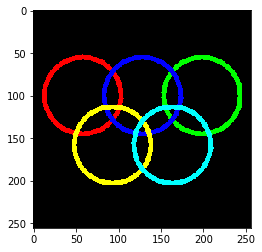

In [18]:
x, _ = dip.Threshold(os)
x = dip.Label(x, boundaryCondition=['', '', 'periodic'])
x = dip.Maximum(x, process=[False, False, True]).Squeeze()
x.Show('labels')

To analyze orientation space, we can fit 2 Gaussians along the orientation dimension.

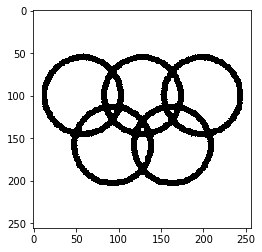

Position:


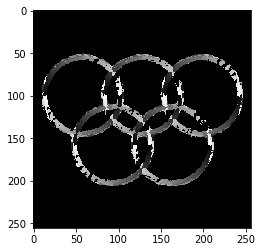

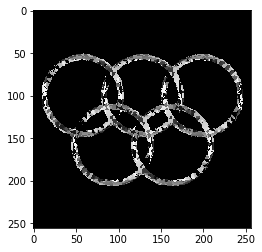

Amplitude:


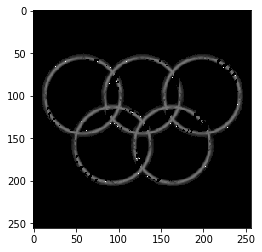

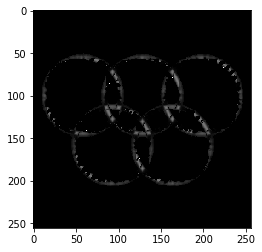

In [22]:
gmm = dip.GaussianMixtureModel(os, 2, 2, flags={'periodic', 'pixel size'})
mask = img<20
mask.Show()
mask.ExpandDimensionality(3)
mask.ExpandSingletonDimension(2, 2)
gmm[mask] = 0
print('Position:')
gmm[:,:,0].TensorElement(0).Show([0,3.14])
gmm[:,:,1].TensorElement(0).Show([0,3.14])
print('Amplitude:')
gmm[:,:,0].TensorElement(1).Show([0,100])
gmm[:,:,1].TensorElement(1).Show([0,100])